In [7]:
import zipfile
import os

# Path of your uploaded zip file
zip_path = "/content/archive (1).zip"   # change name if needed

# Extract files into a folder
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/air_quality")

# Check extracted files
print(os.listdir("/content/air_quality"))



['station_hour.csv', 'city_day.csv', 'city_hour.csv', 'stations.csv', 'station_day.csv']


In [8]:
import pandas as pd

df = pd.read_csv("/content/air_quality/city_day.csv")
df.head()


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [9]:
print(df.shape)          # rows, columns
print(df.columns)        # column names
print(df.isnull().sum()) # missing values
df.info()                # datatypes


(29531, 16)
Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')
City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3

In [10]:
# Drop rows with too many missing values
df = df.dropna(thresh=5)

# Fill remaining missing values with forward fill
df = df.fillna(method='ffill')

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])


/tmp/ipython-input-3383443090.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


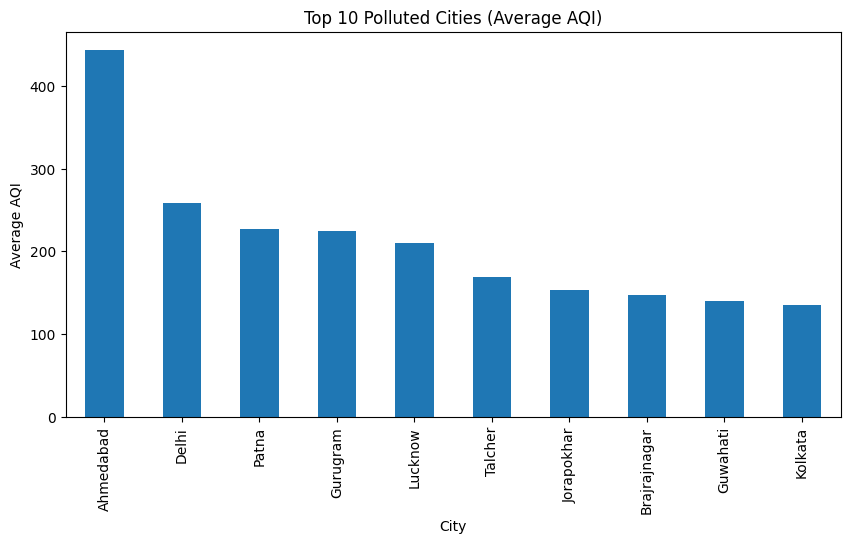

In [11]:
import matplotlib.pyplot as plt

# Average AQI by city
city_aqi = df.groupby("City")["AQI"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
city_aqi.plot(kind="bar")
plt.title("Top 10 Polluted Cities (Average AQI)")
plt.ylabel("Average AQI")
plt.show()
